In [37]:
import cv2 
import numpy as np 
import skimage
from pyfld import FastLineDetector
from PIL import Image
import matplotlib.pyplot as plt
from itertools import product

In [71]:
img = cv2.imread('test2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)


In [72]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [73]:
def line_to_kxb(line, x):
    x1,y1,x2,y2 = line
    k = (y2-y1)/(x2-x1)
    return k*(x-x1) + y1

### 20 30 15 is best for me

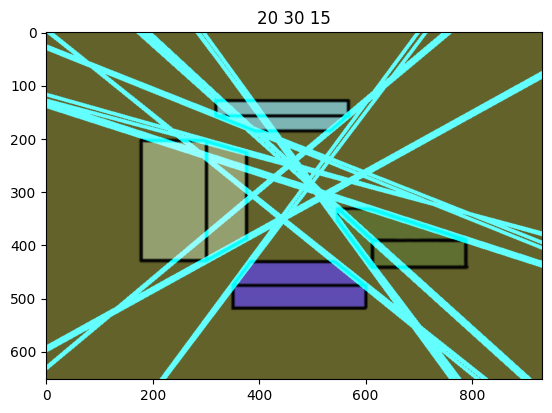

In [74]:


for (thr, mll, mlg) in [(20, 30, 15)]:#product(range(10, 50, 10),range(30, 80, 20), range(5, 20, 5)):
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = thr  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = mll  # minimum number of pixels making up a line
    max_line_gap = mlg  # maximum gap in pixels between connectable line segments
    line_image = np.copy(img) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    for line in lines:
        for x1,y1,x2,y2 in line:
            pass
            #cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    for l in filter(lambda x: x[0][1] != x[0][3] and x[0][0] != x[0][2], lines):
        f = lambda x: line_to_kxb(l[0], x)
        st, end = (0, f(0)), (1500, f(1500))
        cv2.line(line_image, (st[0], int(st[1])), (end[0], int(end[1])), (0, 255, 255), 5)

    lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
    plt.figure()
    plt.title(f"{thr} {mll} {mlg}")
    plt.imshow(lines_edges)

199.1179775280899

In [ ]:
args=np.linspace(0, 1500, 1000)





[(0, 199.1179775280899), (1500, 679.4550561797753)]

[[ 899  487 1077  544]]
[[854 512 920 602]]
[[371 506 436 470]]
[[854 502 919 588]]
[[860 487 912 535]]
[[ 921  487 1100  545]]
[[565 654 599 611]]
[[854 489 926 556]]
[[534 176 606 205]]
[[365 286 443 308]]
[[382 506 443 473]]
[[761 611 819 658]]
[[367 515 419 487]]
[[564 666 601 617]]
[[769 626 803 652]]
[[854 503 918 588]]
[[559 180 612 200]]
[[755 203 789 174]]
[[564 658 565 702]]
[[868 492 922 544]]
[[758 617 805 653]]
[[361 292 443 314]]
[[745 205 783 171]]
[[753 205 785 179]]
[[783 628 819 657]]


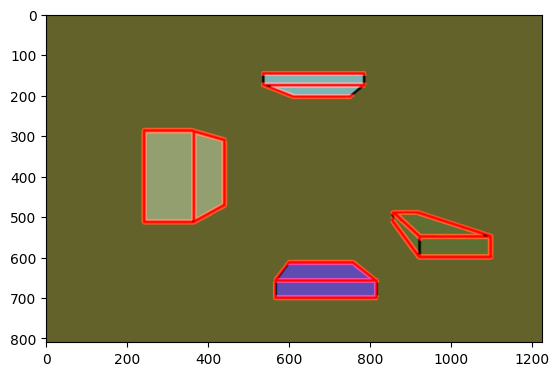